# [NTDS'18] milestone 2: network models
[ntds'18]: https://github.com/mdeff/ntds_2018

[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: `<your team number>`
* Students: `<the name of all students in the team>`
* Dataset: `<the dataset you used to complete the milestone>`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* In the first part, you cannot import any other library than we imported. In the second part, you are allowed to import any library you want.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The purpose of this milestone is to explore various random network models, analyse their properties and compare them to your network. In the first part of the milestone you will implement two random graph models and try to fit them to your network. In this part you are not allowed to use any additional package. In the second part of the milestone you will choose a third random graph model that you think shares some properties with your network. You will be allowed to use additional packages to construct this network, but you must explain your network choice. Finally, make your code as clean as possible, and keep your textual answers short.

## Part 0

Import the adjacency matrix of your graph that you constructed in milestone 1, as well as the number of nodes and edges of your network.

In [4]:
adjacency =  # the adjacency matrix
n_nodes =  # the number of nodes in the network
n_edges =  # the number of edges in the network

SyntaxError: invalid syntax (<ipython-input-4-87a1c4a29e5c>, line 1)

In [2]:
relations = pd.read_csv('data/filtered_relations.csv')
users = pd.read_csv('data/filtered_users.csv')

nodes = users[['User Id', "Time", "Gender", "Age Range", "Spammer Label"]]
num_nodes = len(nodes)

edges = relations[["src", "dst", "relation"]]
num_edges = len(edges)

In [3]:
print(num_nodes)
print(num_edges)

62173
83176


## Part 1

**For the computation of this part of the milestone you are only allowed to use the packages that have been imported in the cell below.**

In [1]:
%matplotlib inline

import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

### Question 1

Create a function that constructs an Erdős–Rényi graph.

In [7]:
def erdos_renyi(n, p, seed=None):
    """Create an instance from the Erdos-Renyi graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    p: float
        Edge probability. A number between 0 and 1.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    if(seed == None):
        seed = np.random.randint(9999999)
    np.random.seed(seed)
    # Your code here.
    adjacency = np.zeros((n, n), dtype=np.dtype('>i1'))
    for i in range(0, n):
        for j in range(i+1, n):
            #If a random number is higher or equal to the edge probability, create an edge, otherwise leave it the same.
            #Do this only for edges where j is bigger than i. Since it means that we have already runned an example to that edge.
            rnd = np.random.random()
            if(p > rnd):
                adjacency[i][j] = 1
                adjacency[j][i] = 1
    
    return adjacency

Text(0.5, 1.05, 'Erdos-Renyi (5, 0.6)')

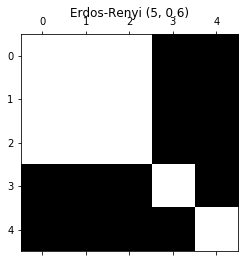

In [9]:
er = erdos_renyi(5, 0.6, 9765)
plt.spy(er)
plt.title('Erdos-Renyi (5, 0.6)')

Text(0.5, 1.05, 'Erdos-Renyi (10, 0.4)')

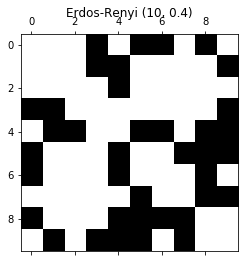

In [10]:
er = erdos_renyi(10, 0.4, 7648)
plt.spy(er)
plt.title('Erdos-Renyi (10, 0.4)')

### Question 2

Use the function to create a random Erdos-Renyi graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

In [11]:
# Your code here.
#Calculate probability of having an edge in our previous graph, with respect to the already given edges.
prob = num_edges / (num_nodes * (num_nodes - 1) / 2)
print(prob)
print(num_edges/num_nodes)
net_er_model = erdos_renyi(num_nodes, prob)

4.303594706416666e-05
1.3378154504366848


**Your answer here.**

The parameter for the number of nodes is the same as the number of nodes in our original graph.

The number of edges in the original graph is 83176 and our graph is directed. We also made an undirected graph, but we are not sure which number of edges we should consider. Thus, we considered the number of edges in the original graph(83176), to be the number of undirected edges, which is basically the same 

We calculate the probability parameter, by dividing the number of edges that we have in our original graph(83176), by the number of maximum edges. In this way we'll get an edge probability parameter.

We could also easily make the function to work for directed graphs. We could do that by setting adjacency[i][j] = 1, only when the condition for probability is satisfied and go through the whole graph with a given probability. But since it was not asked we did not do it, even though it would be much more appropriate for our original graph.

### Question 3

Create a function that constructs a Barabási-Albert graph.

In [39]:
def barabasi_albert(n, m, m0=2, seed=None, fullyConnected=False):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    m0: int (optional)
        Number of nodes for the inital connected network.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    if(m > m0):
        print("Warning: m should be less than or equal to m0, new m0 is: m0=m")
        m0=m
        #return
    
    # initialize the graph 
    adj = None
    if(fullyConnected):
        adj = np.ones((m0, m0), dtype=np.dtype('>i1'))
        np.fill_diagonal(adj, 0)
    else:
        adj = createInitialGraph2(m0)
    
    # develop the network with growth and preferential attachment
    # increase the previous network to the size n by padding the n-m0 nodes, initializing them to 0
    adjacency = np.lib.pad(adj, ((0,n-m0),(0,n-m0)), 'constant', constant_values=(0))
    sum_kj = np.sum(adjacency)
    for i in range(m0, n):
        # add new random edge until node i has m edges
        print("Enter Loop", i)
        nodej = i
        edges_added = 0
        while(edges_added < m):
            # choose a random node between node 0 to i (not n)
            # make sure j and i are not the same node
            while(nodej == i or adjacency[i][nodej] == 1):
                nodej = np.random.randint(i) 
                
            ki = adjacency[nodej].sum()
            if(ki == 0):
                ki = 1
            prob = (float) (ki / sum_kj)
            # draw a random number from a uniform distribution btw [0,1]
            r = np.random.uniform()
            if(r < prob):
                sum_kj = sum_kj + 1
                adjacency[i][nodej] = 1
                adjacency[nodej][i] = 1
                edges_added = edges_added+1
    return adjacency

# helper functions
def createInitialGraph(m0):
    # start with m0 nodes and choose links arbitrarily (at least 1 link per node)
    adjacency = np.zeros((m0, m0), dtype=np.dtype('>i1'))
    connected = False
    while(connected == False):
        # connect nodes randomly until you get at least 1 link per node
        n1 = np.random.randint(m0)
        n2 = n1
        while(n2==n1):
            n2 = np.random.randint(m0)
        if(adjacency[n1][n2] == 0):
            adjacency[n1][n2] = 1
            adjacency[n2][n1] = 1 
        
        # if the graph is connected then each node has at least 1 link
        flag = checkConnected(adjacency)
        if(flag):
            connected=True
    return adjacency

def checkConnected(adj):
    isConnected=False
    sumAdj = adj.sum(axis=1)
    isConnected = all(i > 0 for i in sumAdj)
    return isConnected

In [40]:
# helper functions
def createInitialGraph2(m0):
    # start with m0 nodes and choose links arbitrarily (at least 1 link per node)
    adjacency = np.zeros((m0, m0), dtype=np.dtype('>i1'))
    connected = False
    edges_num = 0
    k = 0
    old_k = 0.5
    while(connected == False):
        # connect nodes randomly until you get at least 1 link per node
        n1 = np.random.randint(m0)
        n2 = np.random.randint(m0)
        #print(n1, n2)
        if(adjacency[n1][n2] == 0 and n1 != n2):
            adjacency[n1][n2] = 1
            adjacency[n2][n1] = 1 
            edges_num = edges_num + 1
            k = (2*edges_num) / m0  
        print("k= ", k)
        #print("oldk=", old_k)
        print(edges_num)
        if ( k >= 1 and old_k + 0.5 == k ):
            old_k = k + 0.5
            # if the graph is connected then each node has at least 1 link
           # print()
            flag = checkConnected2(adjacency)
            if(flag):
                connected=True

    return adjacency

def checkConnected2(adj):
    isConnected=False
    sumAdj = adj.sum(axis=1)
    print(sumAdj)
    isConnected = all(i > 0 for i in sumAdj)
    return isConnected

In [5]:
def createInitialGraph3(m0):
    # start with m0 nodes and choose links arbitrarily (at least 1 link per node)
    adjacency = np.zeros((m0, m0), dtype=np.dtype('>i1'))
    connected = False
    
    # each node has at one link
    for n1 in range(m0):
        while(n2==n1):
            n2 = np.random.randint(m0)
        if(adjacency[n1][n2] == 0):
            adjacency[n1][n2] = 1
            adjacency[n2][n1] = 1 
    
    # if the graph is connected
    connected = checkConnected(adjacency)
    k = m0 / 
    while(connected == False):
        n1 = np.random.randint(m0)
        n2 = n1
        while(n2==n1):
            n2 = np.random.randint(m0)
        if(adjacency[n1][n2] == 0):
            adjacency[n1][n2] = 1
            adjacency[n2][n1] = 1 
        
        # if the graph is connected then each node has at least 1 link
        flag = checkConnected(adjacency)
        if(flag):
            connected=True
    return adjacency

def checkConnected3(adj):
    isConnected=False
    sumAdj = adj.sum(axis=1)
    isConnected = all(i > 0 for i in sumAdj)
    return isConnected

SyntaxError: invalid syntax (<ipython-input-5-2bd4e3a20cc7>, line 16)

1 1
k=  0
oldk= 0.5
0
1 0
k=  1.0
oldk= 0.5
1
HERE
HERE2
ENTER LOOP
2 2
0.5 0.11737646818971892
ENTER LOOP
3 3
0.25 0.9317047828823766
2 3
0.25 0.4648874556202146
2 3
0.25 0.26767529293793224
2 3
0.25 0.4820321278329649
2 3
0.25 0.12756933591879804
ENTER LOOP
4 4
0.3333333333333333 0.0377232141584799


Text(0.5,1.05,'Barabasi-Albert (5, 1)')

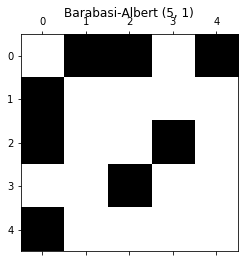

In [23]:
ba = barabasi_albert(5, 1, 2, 9087)
plt.spy(ba)
plt.title('Barabasi-Albert (5, 1)')

In [29]:
ba = barabasi_albert(10, 2, 3, 8708)
plt.spy(ba)
plt.title('Barabasi-Albert (10, 2)')

KeyboardInterrupt: 

In [ ]:
ba = barabasi_albert(10, 2, 3)
plt.spy(ba)
plt.title('Barabasi-Albert (10, 2)')

### Question 4

Use the function to create a random Barabási-Albert graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

In [6]:
n_nodes = 62173
n_edges = 83176 

In [42]:
m = 2
m0 = 1000
ba = barabasi_albert(n_nodes, m, m0)
#ba = barabasi_albert(1000, 1, 2)
#plt.spy(ba)
#plt.title('Barabasi-Albert (5, 1)')

k=  0.002
1
k=  0.004
2
k=  0.006
3
k=  0.008
4
k=  0.01
5
k=  0.012
6
k=  0.014
7
k=  0.016
8
k=  0.018
9
k=  0.02
10
k=  0.022
11
k=  0.024
12
k=  0.026
13
k=  0.028
14
k=  0.03
15
k=  0.032
16
k=  0.034
17
k=  0.036
18
k=  0.038
19
k=  0.04
20
k=  0.042
21
k=  0.044
22
k=  0.046
23
k=  0.048
24
k=  0.05
25
k=  0.052
26
k=  0.054
27
k=  0.056
28
k=  0.058
29
k=  0.06
30
k=  0.062
31
k=  0.064
32
k=  0.066
33
k=  0.068
34
k=  0.07
35
k=  0.072
36
k=  0.074
37
k=  0.076
38
k=  0.078
39
k=  0.08
40
k=  0.082
41
k=  0.084
42
k=  0.086
43
k=  0.088
44
k=  0.09
45
k=  0.092
46
k=  0.094
47
k=  0.096
48
k=  0.098
49
k=  0.1
50
k=  0.102
51
k=  0.104
52
k=  0.106
53
k=  0.108
54
k=  0.11
55
k=  0.112
56
k=  0.114
57
k=  0.116
58
k=  0.118
59
k=  0.12
60
k=  0.122
61
k=  0.124
62
k=  0.126
63
k=  0.128
64
k=  0.13
65
k=  0.132
66
k=  0.134
67
k=  0.136
68
k=  0.138
69
k=  0.14
70
k=  0.142
71
k=  0.144
72
k=  0.146
73
k=  0.148
74
k=  0.15
75
k=  0.152
76
k=  0.154
77
k=  0.156
78
k=  0.158
7

k=  1.332
666
k=  1.334
667
k=  1.336
668
k=  1.338
669
k=  1.34
670
k=  1.342
671
k=  1.344
672
k=  1.346
673
k=  1.348
674
k=  1.35
675
k=  1.352
676
k=  1.354
677
k=  1.356
678
k=  1.358
679
k=  1.36
680
k=  1.362
681
k=  1.364
682
k=  1.366
683
k=  1.368
684
k=  1.37
685
k=  1.372
686
k=  1.374
687
k=  1.376
688
k=  1.378
689
k=  1.38
690
k=  1.382
691
k=  1.384
692
k=  1.386
693
k=  1.388
694
k=  1.39
695
k=  1.392
696
k=  1.394
697
k=  1.396
698
k=  1.398
699
k=  1.4
700
k=  1.402
701
k=  1.404
702
k=  1.406
703
k=  1.408
704
k=  1.41
705
k=  1.412
706
k=  1.414
707
k=  1.416
708
k=  1.418
709
k=  1.42
710
k=  1.422
711
k=  1.424
712
k=  1.426
713
k=  1.428
714
k=  1.43
715
k=  1.432
716
k=  1.434
717
k=  1.436
718
k=  1.438
719
k=  1.44
720
k=  1.442
721
k=  1.444
722
k=  1.446
723
k=  1.448
724
k=  1.45
725
k=  1.452
726
k=  1.454
727
k=  1.456
728
k=  1.458
729
k=  1.46
730
k=  1.462
731
k=  1.464
732
k=  1.466
733
k=  1.468
734
k=  1.47
735
k=  1.472
736
k=  1.474
737
k=  1.4

1493
k=  2.988
1494
k=  2.99
1495
k=  2.992
1496
k=  2.994
1497
k=  2.996
1498
k=  2.998
1499
k=  3.0
1500
[8 2 3 2 5 5 4 2 5 5 6 4 5 2 4 3 3 1 0 4 3 2 2 2 3 8 1 3 4 4 2 0 3 2 5 2 6
 4 2 2 2 4 2 4 4 4 3 0 2 1 5 2 5 3 3 5 3 0 2 6 1 2 2 3 1 3 1 2 2 2 5 2 1 1
 3 3 4 3 3 4 1 2 3 0 1 7 5 3 1 3 1 2 3 2 4 4 2 3 5 5 4 1 4 5 2 2 7 1 4 5 4
 5 1 2 2 1 3 2 4 1 3 2 0 1 3 4 4 3 0 3 1 5 1 1 3 3 1 6 4 4 4 1 4 2 3 4 1 0
 2 4 4 4 4 5 2 2 2 0 4 6 3 1 2 5 5 3 3 5 3 2 1 5 2 1 2 1 5 4 7 4 4 3 4 2 2
 5 2 1 5 4 2 4 0 0 3 1 6 2 2 8 2 2 3 2 2 2 2 1 5 1 3 3 4 3 2 0 2 6 3 1 3 3
 2 2 2 4 1 4 1 6 4 3 5 2 2 3 4 5 1 0 6 2 5 2 3 6 6 1 3 3 4 3 9 3 3 3 1 2 2
 1 1 6 3 1 2 5 4 1 4 0 4 3 4 3 1 3 3 3 1 3 6 5 6 3 5 0 1 2 3 4 4 1 2 1 3 2
 5 4 5 5 4 3 4 3 4 4 1 2 1 3 4 4 7 0 3 4 3 1 2 1 3 1 3 2 2 2 2 1 4 3 6 5 2
 0 1 2 2 5 5 5 3 4 3 2 6 0 1 4 6 2 4 1 3 6 2 4 1 1 3 1 1 7 1 5 8 4 3 3 4 0
 3 4 3 4 3 2 1 1 3 1 3 2 2 2 5 0 1 3 2 2 6 5 5 2 3 2 2 3 2 4 0 3 2 3 4 3 4
 6 1 4 6 0 1 1 5 2 5 3 2 2 0 2 5 6 1 2 3 8 2 2 0 3 3 3 3 2 5 4 2 6 1

k=  4.314
2157
k=  4.316
2158
k=  4.318
2159
k=  4.32
2160
k=  4.322
2161
k=  4.324
2162
k=  4.326
2163
k=  4.328
2164
k=  4.33
2165
k=  4.332
2166
k=  4.334
2167
k=  4.336
2168
k=  4.338
2169
k=  4.34
2170
k=  4.342
2171
k=  4.344
2172
k=  4.346
2173
k=  4.348
2174
k=  4.35
2175
k=  4.352
2176
k=  4.354
2177
k=  4.356
2178
k=  4.358
2179
k=  4.36
2180
k=  4.362
2181
k=  4.364
2182
k=  4.366
2183
k=  4.368
2184
k=  4.37
2185
k=  4.372
2186
k=  4.374
2187
k=  4.376
2188
k=  4.378
2189
k=  4.38
2190
k=  4.382
2191
k=  4.384
2192
k=  4.386
2193
k=  4.388
2194
k=  4.39
2195
k=  4.392
2196
k=  4.394
2197
k=  4.396
2198
k=  4.398
2199
k=  4.4
2200
k=  4.402
2201
k=  4.404
2202
k=  4.406
2203
k=  4.408
2204
k=  4.41
2205
k=  4.412
2206
k=  4.414
2207
k=  4.416
2208
k=  4.418
2209
k=  4.42
2210
k=  4.422
2211
k=  4.424
2212
k=  4.426
2213
k=  4.428
2214
k=  4.43
2215
k=  4.432
2216
k=  4.434
2217
k=  4.436
2218
k=  4.438
2219
k=  4.44
2220
k=  4.442
2221
k=  4.444
2222
k=  4.446
2223
k=  4.448

2822
k=  5.646
2823
k=  5.648
2824
k=  5.65
2825
k=  5.652
2826
k=  5.654
2827
k=  5.656
2828
k=  5.658
2829
k=  5.66
2830
k=  5.662
2831
k=  5.664
2832
k=  5.666
2833
k=  5.668
2834
k=  5.67
2835
k=  5.672
2836
k=  5.674
2837
k=  5.676
2838
k=  5.678
2839
k=  5.68
2840
k=  5.682
2841
k=  5.684
2842
k=  5.686
2843
k=  5.688
2844
k=  5.69
2845
k=  5.692
2846
k=  5.694
2847
k=  5.696
2848
k=  5.698
2849
k=  5.7
2850
k=  5.702
2851
k=  5.704
2852
k=  5.706
2853
k=  5.708
2854
k=  5.71
2855
k=  5.712
2856
k=  5.714
2857
k=  5.716
2858
k=  5.718
2859
k=  5.72
2860
k=  5.722
2861
k=  5.724
2862
k=  5.726
2863
k=  5.728
2864
k=  5.73
2865
k=  5.732
2866
k=  5.734
2867
k=  5.736
2868
k=  5.738
2869
k=  5.74
2870
k=  5.742
2871
k=  5.744
2872
k=  5.746
2873
k=  5.748
2874
k=  5.75
2875
k=  5.752
2876
k=  5.754
2877
k=  5.756
2878
k=  5.758
2879
k=  5.76
2880
k=  5.762
2881
k=  5.764
2882
k=  5.766
2883
k=  5.768
2884
k=  5.77
2885
k=  5.772
2886
k=  5.774
2887
k=  5.776
2888
k=  5.778
2889
k=  

KeyboardInterrupt: 

For the barabasi_albert function, n is equal to the number of nodes in our original graph which is 62173.     
We chose m and m0 in order to have a similar number of edges with our original graph.     
__Initialization:__ $m0$ edges (at least)     
__Develop the network part:__ $m * (n - m0)$ edges   
__Total edges created:__ $m0 + m *(n-m0)$ edges (at least).   
We need to also keep in mind m <= m0.
Hence, we need to ensure $m0 + m *(n-m0)$ similar to num_edges: 
Some possible solutions:    
m = 7002 and m0 = 62170.   
m = 21004 and m0 = 62172.     
m= 4 and m0 = 55172.   
Note: We assumed undirected graph

### Question 5

Compare the number of edges in all three networks (your real network, the Erdős–Rényi network, and the Barabási-Albert netowk).

In [ ]:
# Your code here.

### Question 6

Implement a function that computes the [Kullback–Leibler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between two probability distributions.
We'll use it to compare the degree distributions of networks.

In [ ]:
def kl_divergence(p, q):
    """Compute the KL divergence between probability distributions of degrees of two networks.
    
    Parameters
    ----------
    p: np.array
        Probability distribution of degrees of the 1st graph.
    q: np.array
        Probability distribution of degrees of the 2nd graph.
    
    Returns
    -------
    kl
        The KL divergence between the two distributions.
    """
    
    # Your code here.
    
    return kl

In [ ]:
p_test = np.array([0.2, 0.2, 0.2, 0.4])
q_test = np.array([0.3, 0.3, 0.1, 0.3])
kl_divergence(p_test, q_test)

### Question 7: 

Compare the degree distribution of your network to each of the two synthetic ones, in terms of KL divergence.

**Hint:** Make sure you normalise your degree distributions to make them valid probability distributions.

**Hint:** Make sure none of the graphs have disconnected nodes, as KL divergence will not be defined in that case. If that happens with one of the randomly generated networks, you can regenerate it and keep the seed that gives you no disconnected nodes.

In [ ]:
# Your code here.

### Question 8

Plot the degree distribution historgrams for all three networks. Are they consistent with the KL divergence results? Explain.

In [ ]:
# Your code here.

**Your answer here.**

### Question 9

Imagine you got equal degree distributions. Would that guarantee you got the same graph? Explain.

**Your answer here.**

## Part 2

**You are allowed to use any additional library here (e.g., NetworkX, PyGSP, etc.).** Be careful not to include something here and use it in part 1!

### Question 10

Choose a random network model that fits you network well. Explain your choice. 

**Hint:** Check lecture notes for different network models and their properties. Your choice should be made based on at least one property you'd expect to be similar.

**Your answer here.**

### Question 11

Explain (in short) how the chosen model works.

**Your answer here.**

### Question 12

Create a random graph from that model, such that the number of nodes is the same as in your graph.

In [ ]:
# Your code here.

### Question 13

Check the properties you expected to be similar, and compare to your network.

In [ ]:
# Your code here.

Are the results what you expected? Explain.

**Your answer here.**